# Plots to be included in the Thesis
Summarysing the Celltypist prediction results on different datasets and 

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [23]:
raw_df = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/CellTypeAssignment metrics/Celltypist/Celltypist_confidence_scores.csv')

print(raw_df.head())

     Bin8x8  Bin2Cell     Enact      Xseg    Tonsil     ScRef
0  0.173920  0.415195  0.062796  0.043314  0.065704  0.219440
1  0.111783  0.308685  0.028867  0.896519  0.417705  0.999260
2  0.653658  0.219721  0.031286  0.397644  0.263028  0.970444
3  0.790891  0.318133  0.050490  0.229899  0.068869  0.946018
4  0.189795  0.124476  0.199702  0.662286  0.039881  0.973019


/misc/ngseq12/miniforge3/envs/tmp_enact_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/misc/ngseq12/miniforge3/envs/tmp_enact_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/misc/ngseq12/miniforge3/envs/tmp_enact_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/misc/ngseq12/miniforge3/envs/tmp_enact_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height

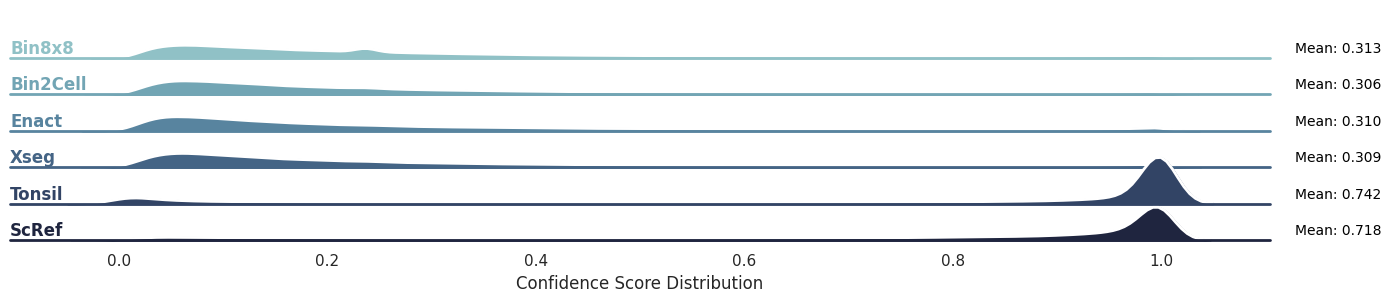

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe to long format
df_ridge = raw_df.melt(var_name="Method", value_name="Confidence Score")
df_ridge = df_ridge.dropna()

# Set the theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create a color palette
pal = sns.cubehelix_palette(len(raw_df.columns), rot=-.25, light=.7)

# Initialize the FacetGrid object
g = sns.FacetGrid(df_ridge, row="Method", hue="Method", aspect=15, height=.5, palette=pal)

# Draw the densities
g.map(sns.kdeplot, "Confidence Score",
    bw_adjust=.5, clip_on=False,
    fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Confidence Score", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
        ha="left", va="center", transform=ax.transAxes)

g.map(label, "Confidence Score")
# Add mean confidence score as text on the side of each ridge plot
for ax, method in zip(g.axes.flat, df_ridge['Method'].unique()):
    mean_score = df_ridge[df_ridge['Method'] == method]['Confidence Score'].mean()
    ax.text(1.02, 0.2, f"Mean: {mean_score:.3f}", transform=ax.transAxes,
            ha='left', va='center', fontsize=10, color='black')
g.figure.subplots_adjust(hspace=-.25, left=-0.78)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xlabel('Confidence Score Distribution')
plt.show()

In [17]:
ratio_above_09 = (raw_df.astype(float) > 0.9).sum() / raw_df.notna().sum()
print("Ratio of confidence scores above 0.9 for each method:")
print(ratio_above_09)

Ratio of confidence scores above 0.9 for each method:
Bin8x8      0.049231
Bin2Cell    0.048995
Enact       0.057456
Xseg        0.056656
Tonsil      0.588016
ScRef       0.477104
dtype: float64


# Cell Type proportions

In [18]:
df_counts = pd.read_csv('./Celltypist_predicted_cell_types_counts.csv')
print(df_counts.head())

  Cell Type pred      SC    ENACT      B2C     Xseg   Bin8x8
0           AT1   2966.0   2235.0   1521.0    734.0   1429.0
1            AT2  7025.0  18365.0  18117.0  14836.0  41371.0
2       B_memory  3076.0  16910.0  13919.0  11810.0  21932.0
3        B_naive   319.0     93.0     47.0     38.0     56.0
4   B_plasma_IgA  1356.0   5188.0   3735.0   2781.0   5207.0


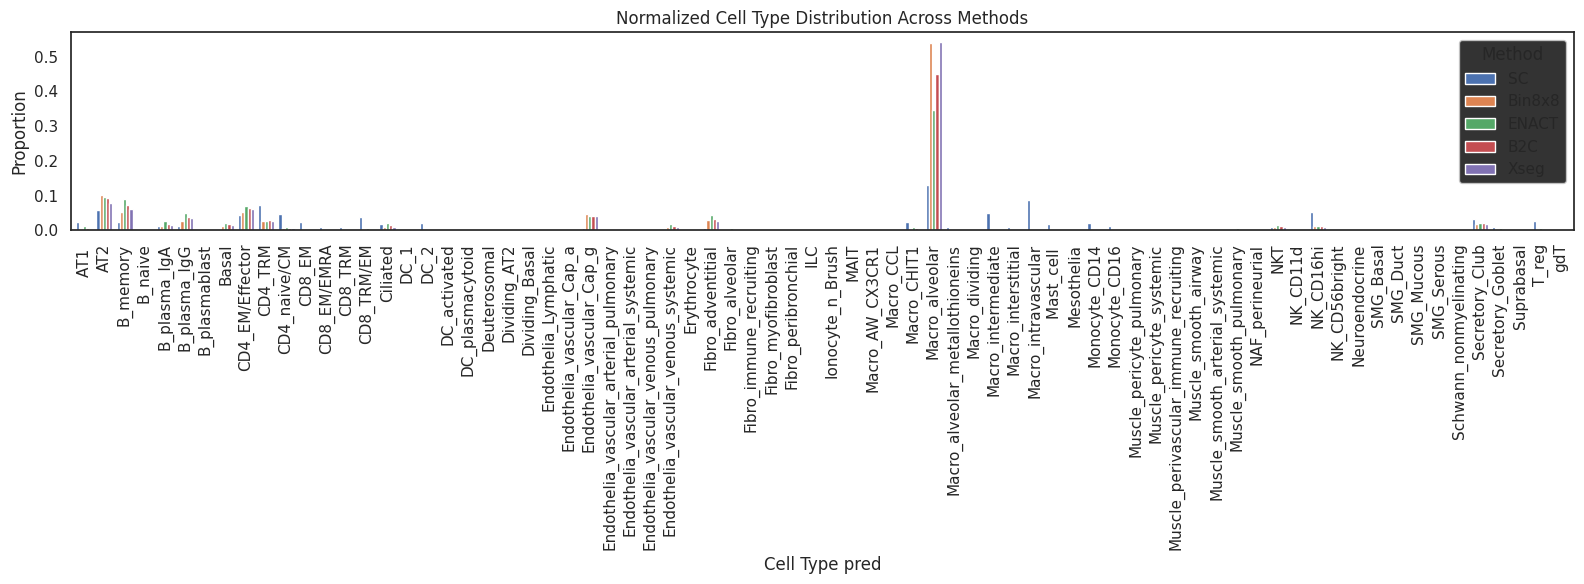

In [19]:
normalized_counts = df_counts.set_index('Cell Type pred')[['SC', 'Bin8x8', 'ENACT','B2C', 'Xseg']].div(
    df_counts[['SC', 'Bin8x8', 'ENACT','B2C', 'Xseg']].sum()
)
normalized_counts.plot(
    kind='bar',
    figsize=(16, 6),
    width=0.8
)
plt.ylabel('Proportion')
plt.title('Normalized Cell Type Distribution Across Methods')
plt.legend(title='Method')
plt.tight_layout()
plt.show()

In [20]:
print(df_counts['Cell Type pred'])

0                 AT1 
1                  AT2
2             B_memory
3              B_naive
4         B_plasma_IgA
            ...       
69      Secretory_Club
70    Secretory_Goblet
71          Suprabasal
72               T_reg
73                 gdT
Name: Cell Type pred, Length: 74, dtype: object


In [21]:
import json

# Create a cell type map by mapping each label to its prefix (before the first underscore)
with open('./cell_type_map_VpX.json', 'r') as f:
    cell_type_map = json.load(f)
print(cell_type_map)

{'AT1 ': 'AT1 ', 'AT2': 'AT2', 'B_memory': 'B', 'B_naive': 'B', 'B_plasma_IgA': 'B', 'B_plasma_IgG': 'B', 'B_plasmablast': 'B', 'Basal': 'Basal', 'CD4_EM/Effector': 'CD4', 'CD4_TRM': 'CD4', 'CD4_naive/CM': 'CD4', 'CD8_EM': 'CD8', 'CD8_EM/EMRA': 'CD8', 'CD8_TRM': 'CD8', 'CD8_TRM/EM': 'CD8', 'Ciliated': 'Ciliated', 'DC_1': 'DC', 'DC_2': 'DC', 'DC_activated': 'DC', 'DC_plasmacytoid': 'DC', 'Deuterosomal': 'other', 'Dividing_AT2': 'other', 'Dividing_Basal': 'other', 'Endothelia_Lymphatic': 'Endothelia', 'Endothelia_vascular_Cap_a': 'Endothelia', 'Endothelia_vascular_Cap_g': 'Endothelia', 'Endothelia_vascular_arterial_pulmonary': 'Endothelia', 'Endothelia_vascular_arterial_systemic': 'Endothelia', 'Endothelia_vascular_venous_pulmonary': 'Endothelia', 'Endothelia_vascular_venous_systemic': 'Endothelia', 'Erythrocyte': 'other', 'Fibro_adventitial': 'Fibro', 'Fibro_alveolar': 'Fibro', 'Fibro_immune_recruiting': 'Fibro', 'Fibro_myofibroblast': 'Fibro', 'Fibro_peribronchial': 'Fibro', 'ILC': 'ot

In [24]:
# Add a column for the broad/general cell type
df_counts['Broad_Cell_Type'] = df_counts['Cell Type pred'].map(cell_type_map).fillna(df_counts['Cell Type pred'])

# Aggregate the counts by the new broad/general cell types
aggregated_counts = df_counts.groupby('Broad_Cell_Type')[['SC', 'Bin8x8', 'ENACT','B2C', 'Xseg']].sum()
# Remove rows where the broad cell type is the same as the original fine cell type
aggregated_counts

,SC,Bin8x8,ENACT,B2C,Xseg
Broad_Cell_Type,,,,,
AT1,2966.0,1429.0,2235.0,1521.0,734.0
AT2,7025.0,41371.0,18365.0,18117.0,14836.0
B,6228.0,38240.0,31411.0,25380.0,21246.0
Basal,525.0,5335.0,4032.0,3680.0,2798.0
CD4,19746.0,35971.0,20135.0,19823.0,17808.0
CD8,10052.0,1019.0,1380.0,852.0,517.0
Ciliated,2151.0,3742.0,3906.0,2726.0,2097.0
DC,3524.0,109.0,162.0,89.0,46.0
Endothelia,2890.0,24781.0,13064.0,11824.0,9987.0


In [25]:
normalized_aggregated = aggregated_counts.div(aggregated_counts.sum())
# Remove broad cell types with less than 1% in all methods (filtering)
normalized_aggregated 

,SC,Bin8x8,ENACT,B2C,Xseg
Broad_Cell_Type,,,,,
AT1,0.024520,0.003475,0.011851,0.007846,0.003895
AT2,0.058077,0.100600,0.097377,0.093456,0.078738
B,0.051488,0.092987,0.166552,0.130922,0.112757
Basal,0.004340,0.012973,0.021379,0.018983,0.014850
CD4,0.163243,0.087469,0.106763,0.102256,0.094511
CD8,0.083101,0.002478,0.007317,0.004395,0.002744
Ciliated,0.017783,0.009099,0.020711,0.014062,0.011129
DC,0.029133,0.000265,0.000859,0.000459,0.000244
Endothelia,0.023892,0.060259,0.069270,0.060994,0.053003


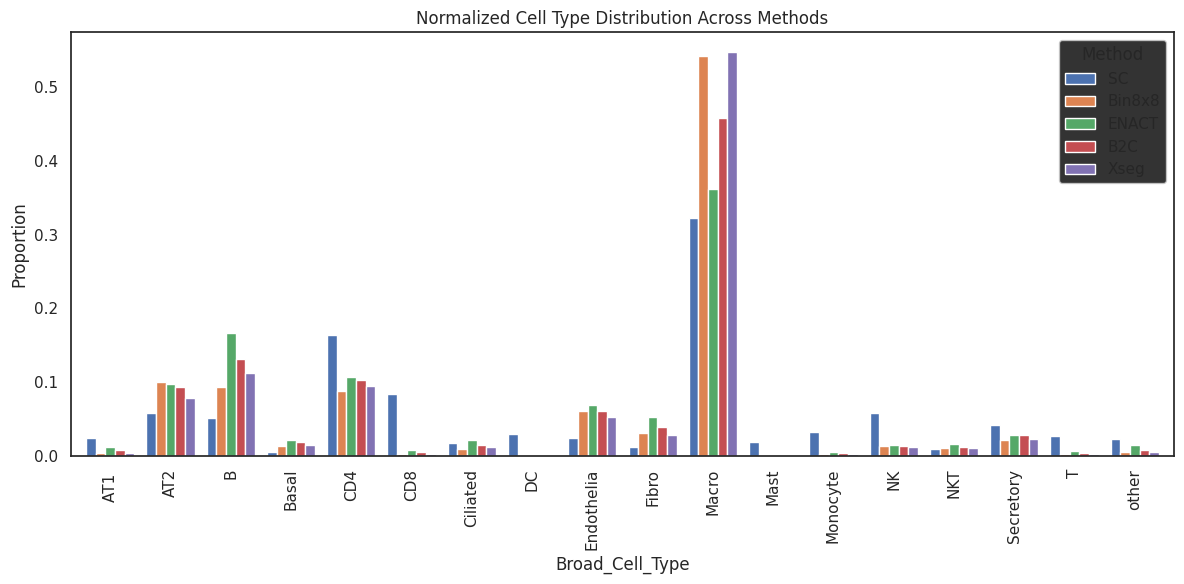

In [26]:
normalized_aggregated.plot(
    kind='bar',
    figsize=(12, 6),
    width=0.8
)

plt.ylabel('Proportion')
plt.title('Normalized Cell Type Distribution Across Methods')
plt.legend(title='Method')
plt.tight_layout()
plt.show()

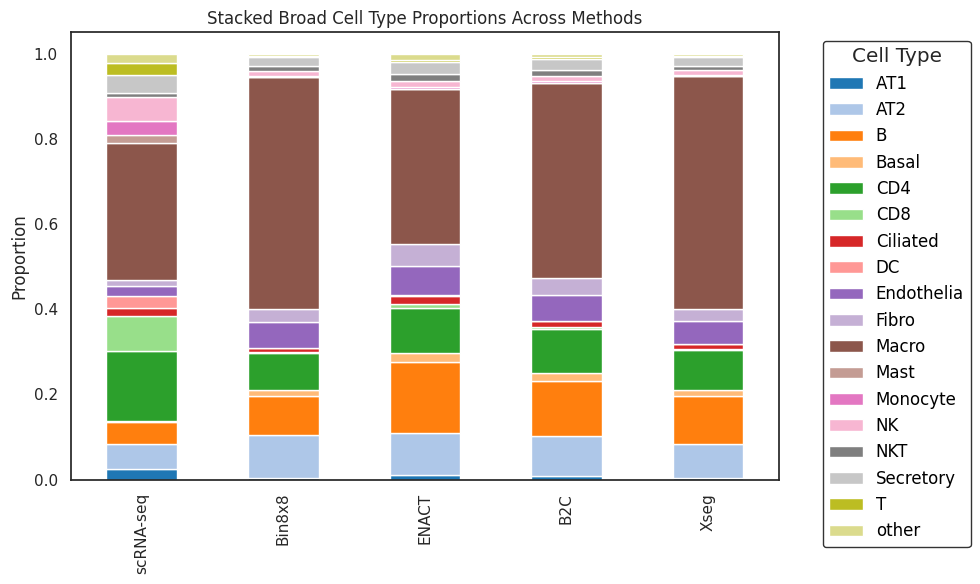

In [32]:
# Plot stacked bar chart for broad cell type proportions
colors = plt.cm.tab20.colors  # Use a colormap with enough distinct colors

normalized_aggregated = normalized_aggregated.rename(columns={'SC': 'scRNA-seq'})
cell_types =np.sort(normalized_aggregated.index)
methods = normalized_aggregated.columns

# Assign a color to each cell type
color_map = {cell_type: colors[i % len(colors)] for i, cell_type in enumerate(cell_types)}

ax = normalized_aggregated.T.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[color_map[ct] for ct in cell_types]
)

plt.ylabel('Proportion')
plt.title('Stacked Broad Cell Type Proportions Across Methods')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='white', edgecolor='black', labelcolor='black', title_fontsize='large', fontsize='medium')

plt.tight_layout()
plt.show()